In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from publish import *

# OBESITY DATA

In [4]:
obesity_data = pd.read_csv("Nutrition_Physical_Activity_and_Obesity_Data.csv")

obesity_data

/var/folders/2m/q4hnt9rs52xf6dg1gdmh3vym0000gn/T/ipykernel_76665/64693403.py:1: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  obesity_data = pd.read_csv("Nutrition_Physical_Activity_and_Obesity_Data.csv")


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,AK,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,NaN,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q048,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,VALUE,4,Total,Total,OVR,OVERALL
2,2019,2019,DC,District of Columbia,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q038,VALUE,11,Total,Total,OVR,OVERALL
3,2019,2019,IL,Illinois,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,NaN,Value,...,"(40.485010283, -88.997710178)",PA,PA1,Q049,VALUE,17,Grade,10th,GRADE,GRADE10
4,2019,2019,MD,Maryland,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,NaN,Value,...,"(39.290580964, -76.609260111)",OWS,OWS1,Q039,VALUE,24,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133340,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"Less than $15,000",INC,INCLESS15
133341,2022,2022,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Education,Less than high school,EDU,EDUHS
133342,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,56,Age (years),35 - 44,AGEYR,AGEYR3544
133343,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"$35,000 - $49,999",INC,INC3550


In [5]:
checking_warning = obesity_data.iloc[:, [18, 19, 21, 22]]

for column_name in checking_warning:
    column = checking_warning[column_name]
    print(column_name, ":", column.apply(lambda x: type(x)).unique())

Age(years) : [<class 'float'> <class 'str'>]
Education : [<class 'float'> <class 'str'>]
Grade : [<class 'float'> <class 'str'>]
Income : [<class 'float'> <class 'str'>]


In [6]:
for column_name in checking_warning:
    column = checking_warning[column_name]
    for val in column:
        if type(val) == type(obesity_data["Data_Value_Unit"][0]) and val != obesity_data["Data_Value_Unit"][0]:
            print(val)
print(obesity_data["Data_Value_Unit"][0])

nan


##### - All float values from warning arise from NA values, which are in numpy.float64 datatypes

In [7]:
# Dropping the rows that are not useful or empty (as given in the data schema pdf)
obesity_data = obesity_data.drop(["Data_Value_Unit", "Data_Value_Type", "Total"], axis=1)

obesity_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value,Data_Value_Alt,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,AK,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,9.6,9.6,...,"(64.845079957001, -147.722059036)",PA,PA1,Q048,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,13.3,13.3,...,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,VALUE,4,Total,Total,OVR,OVERALL
2,2019,2019,DC,District of Columbia,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,17.1,17.1,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q038,VALUE,11,Total,Total,OVR,OVERALL
3,2019,2019,IL,Illinois,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,65.9,65.9,...,"(40.485010283, -88.997710178)",PA,PA1,Q049,VALUE,17,Grade,10th,GRADE,GRADE10
4,2019,2019,MD,Maryland,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,16.7,16.7,...,"(39.290580964, -76.609260111)",OWS,OWS1,Q039,VALUE,24,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133340,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,24.5,24.5,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"Less than $15,000",INC,INCLESS15
133341,2022,2022,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,36.0,36.0,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Education,Less than high school,EDU,EDUHS
133342,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.2,35.2,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,56,Age (years),35 - 44,AGEYR,AGEYR3544
133343,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.3,35.3,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"$35,000 - $49,999",INC,INC3550


In [8]:
for d1, d2 in zip(obesity_data["Data_Value"].values, obesity_data["Data_Value_Alt"].values):
    if d1 != d2:
        if not pd.isnull(d1) or not pd.isnull(d2):
            print("INCONSISTENT ALT")

obesity_data = obesity_data.drop(["Data_Value_Alt"], axis=1)

In [9]:
# Splitting into datasets of unique questions and locations
questions = obesity_data["QuestionID"].unique()

questions

array(['Q048', 'Q038', 'Q049', 'Q039', 'Q058', 'Q021', 'Q020', 'Q059',
       'Q047', 'Q036', 'Q037', 'Q045', 'Q044', 'Q043', 'Q046', 'Q018',
       'Q019'], dtype=object)

In [10]:
ID_to_question_map = {}

for _, row in obesity_data[["Question", "QuestionID"]].iterrows():
    if row["QuestionID"] not in ID_to_question_map:
        ID_to_question_map[row["QuestionID"]] = row["Question"]
    elif row["Question"] != ID_to_question_map[row["QuestionID"]]:
        print("INCONSISTENT MAP")

ID_to_question_map

{'Q048': 'Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily',
 'Q038': 'Percent of students in grades 9-12 who have obesity',
 'Q049': 'Percent of students in grades 9-12 who participate in daily physical education',
 'Q039': 'Percent of students in grades 9-12 who have an overweight classification',
 'Q058': 'Percent of students in grades 9-12 who drank regular soda/pop at least one time per day',
 'Q021': 'Percent of students in grades 9-12 who consume vegetables less than 1 time daily',
 'Q020': 'Percent of students in grades 9-12 who consume fruit less than 1 time daily',
 'Q059': 'Percent of students in grades 9-12 watching 3 or more hours of television each school day',
 'Q047': 'Percent of adults who engage in no leisure-time physical activity',
 'Q036': 'Percent of adults aged 18 years and older who have obesity',
 'Q037': 'Percent of adults aged 18 years and older who have an overweight classification',


In [11]:
locations = obesity_data["LocationAbbr"].unique()

locations

array(['AK', 'AZ', 'DC', 'IL', 'MD', 'RI', 'MT', 'NE', 'NM', 'NY', 'NC',
       'SD', 'TX', 'UT', 'VT', 'VA', 'WV', 'GU', 'PR', 'IA', 'KS', 'OK',
       'AL', 'ME', 'FL', 'ID', 'US', 'NH', 'ND', 'TN', 'KY', 'AR', 'NJ',
       'IN', 'DE', 'HI', 'MS', 'WY', 'CT', 'GA', 'CA', 'LA', 'MI', 'NV',
       'SC', 'MA', 'PA', 'CO', 'VI', 'WI', 'OH', 'MO', 'WA', 'MN', 'OR'],
      dtype=object)

In [12]:
question_and_location_dfs = {}

for question in questions:
    question_and_location_dfs[question] = {}
    for location in locations:
        condensed_df = obesity_data[(obesity_data["LocationAbbr"] == location) & (obesity_data["QuestionID"] == question) & (obesity_data["StratificationID1"] == "OVERALL")].reset_index().drop(["index"], axis=1)
        if len(condensed_df) != 0:
            question_and_location_dfs[question][location] = condensed_df
        else:
            print(location, question)

VI Q048
WA Q048
MN Q048
OR Q048
WA Q038
MN Q038
OR Q038
WA Q049
MN Q049
OR Q049
WA Q039
MN Q039
OR Q039
VI Q058
WA Q058
MN Q058
OR Q058
WA Q021
MN Q021
OR Q021
WA Q020
MN Q020
OR Q020
WA Q059
MN Q059
OR Q059


#### Washington, Minnesota and Oregon missing 8 questions, VI missing 2

In [13]:
strat_types = obesity_data["StratificationID1"].unique()

strat_types

array(['RACEASN', 'OVERALL', 'GRADE10', 'RACE2PLUS', 'GRADE09', 'FEMALE',
       'RACEHIS', 'GRADE11', 'GRADE12', 'RACEWHT', 'MALE', 'RACEBLK',
       'RACENAA', 'RACEHPI', 'EDUHSGRAD', 'INC5075', 'INCNR', 'INCLESS15',
       'EDUHS', 'INC2535', 'AGEYR2534', 'RACEOTH', 'AGEYR5564',
       'EDUCOTEC', 'AGEYR1824', 'AGEYR4554', 'INC1525', 'AGEYR3544',
       'EDUCOGRAD', 'INC3550', 'INC75PLUS', 'AGEYR65PLUS', nan],
      dtype=object)

#### For now, I will ignore stratification types, but this may be interesting to explore

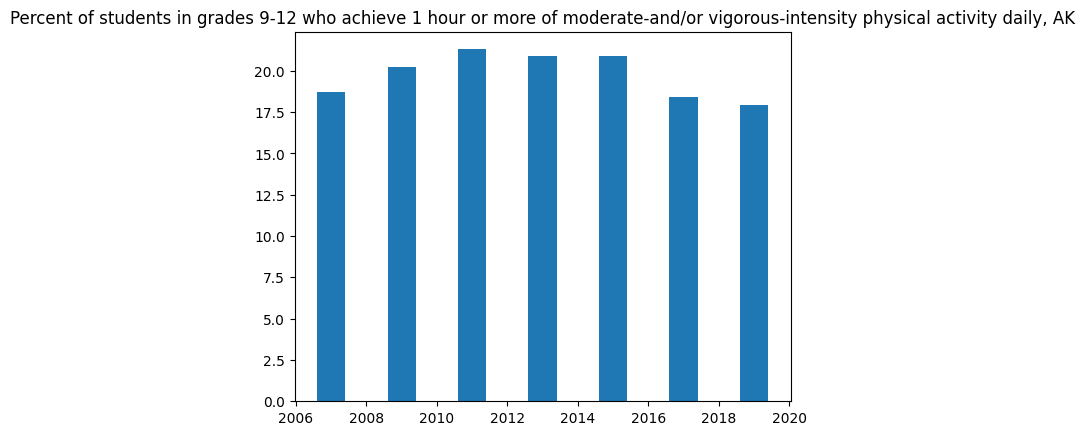

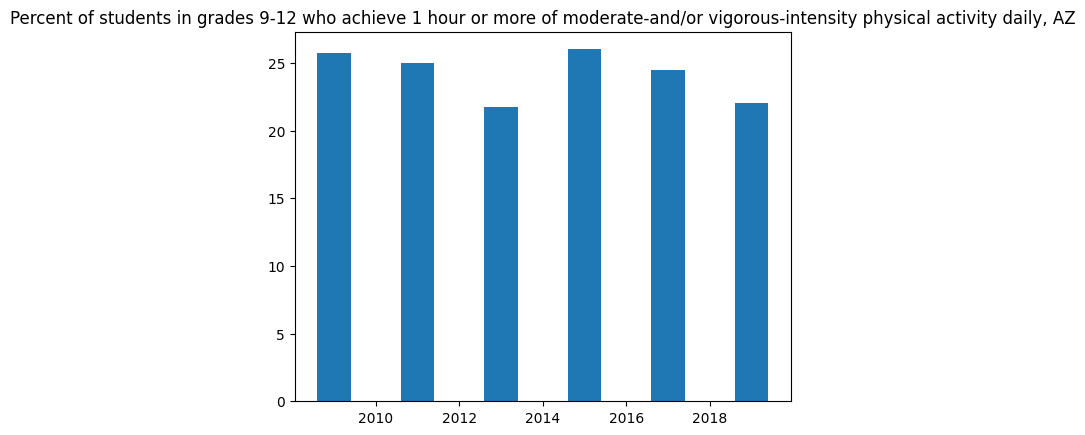

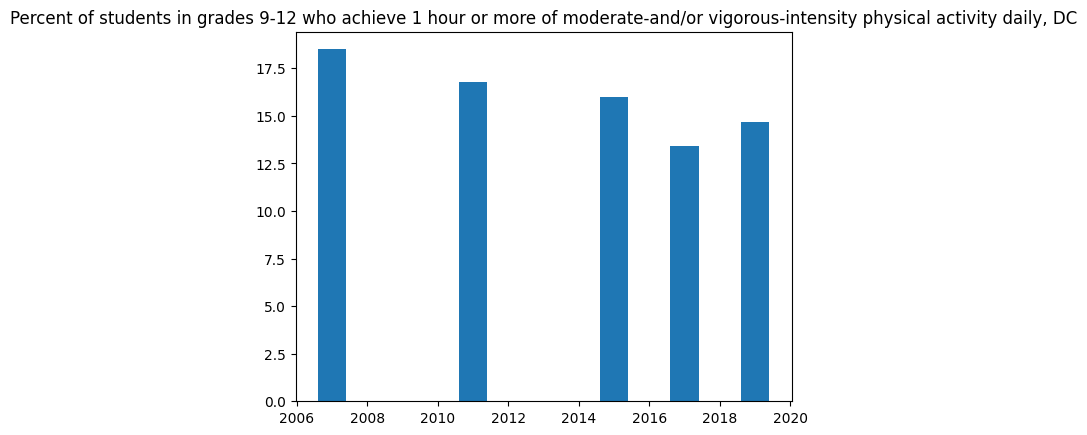

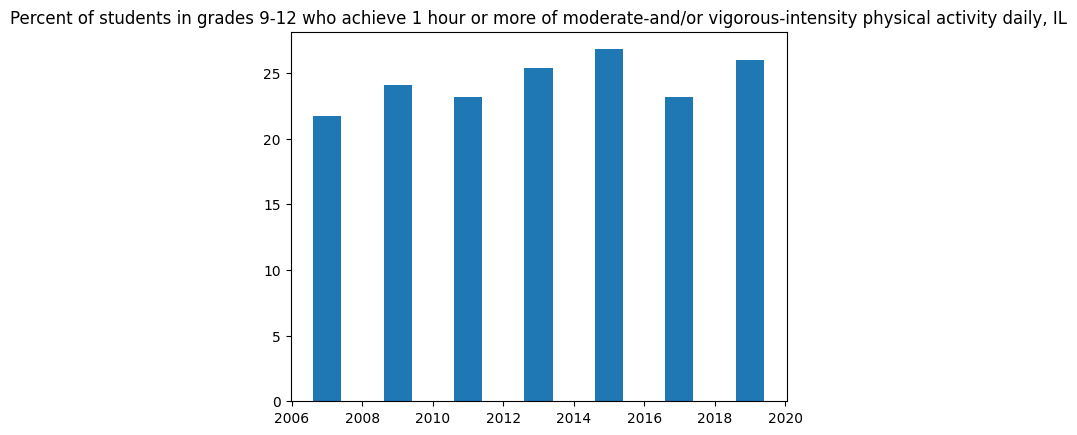

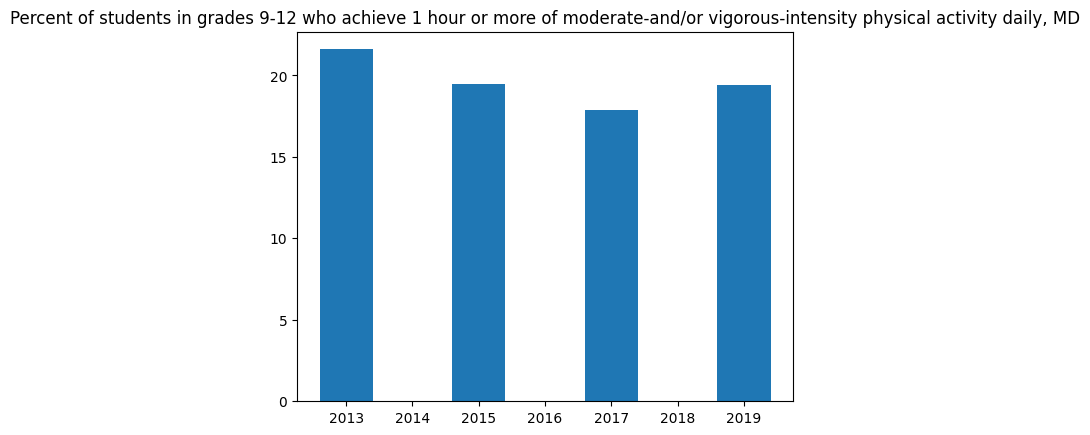

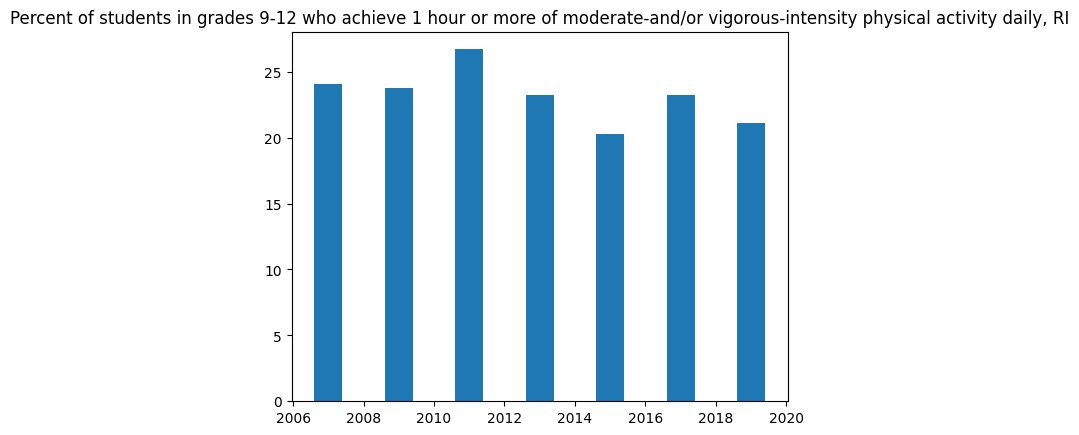

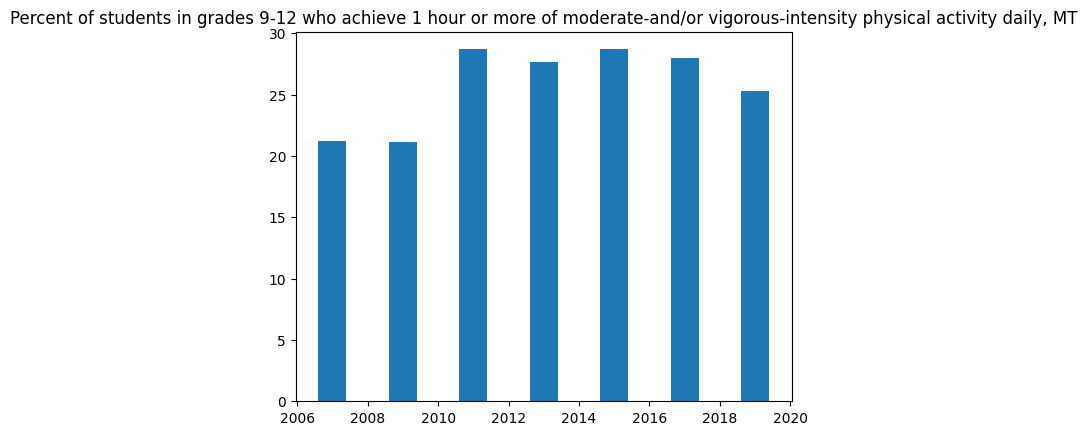

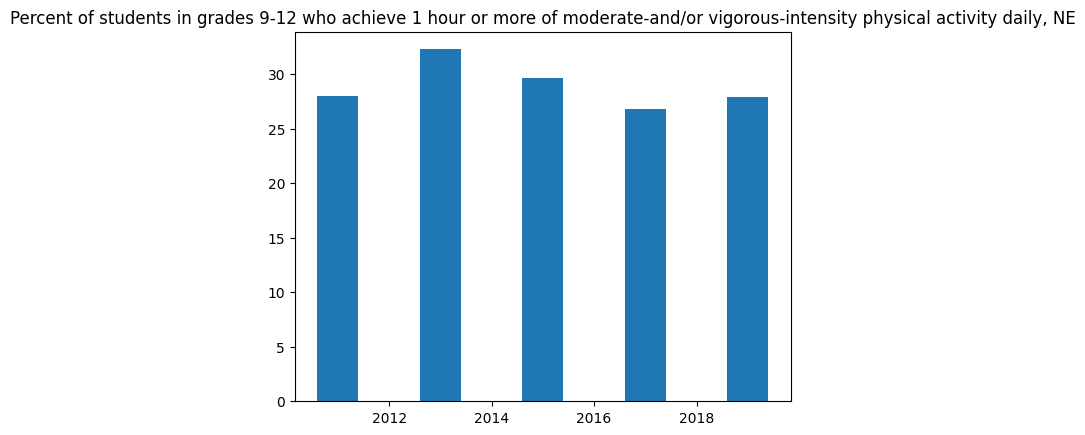

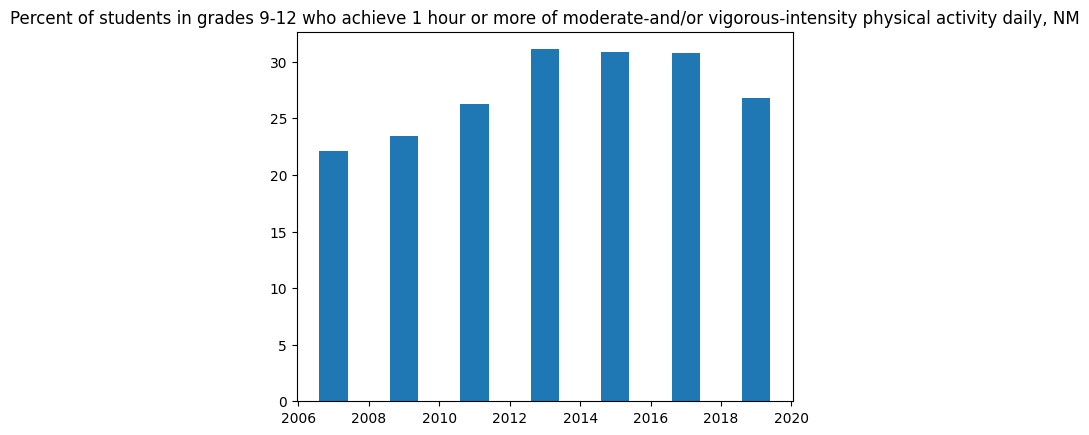

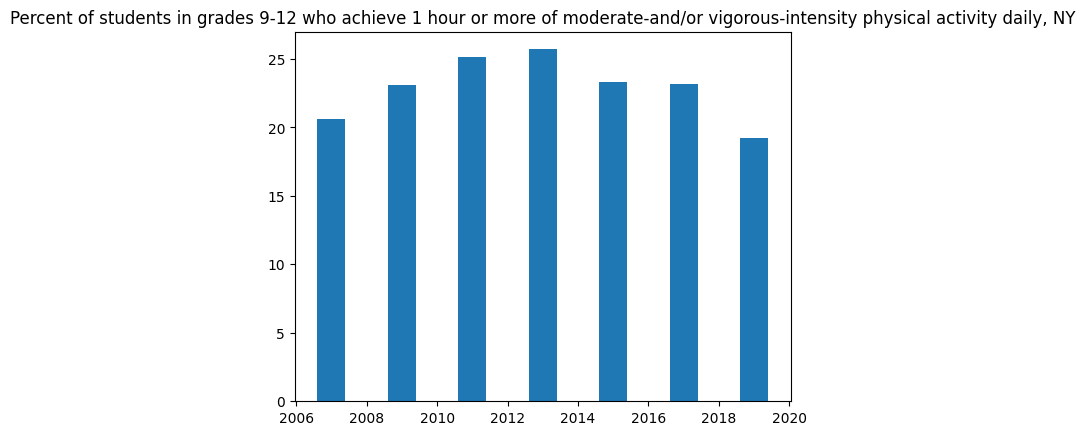

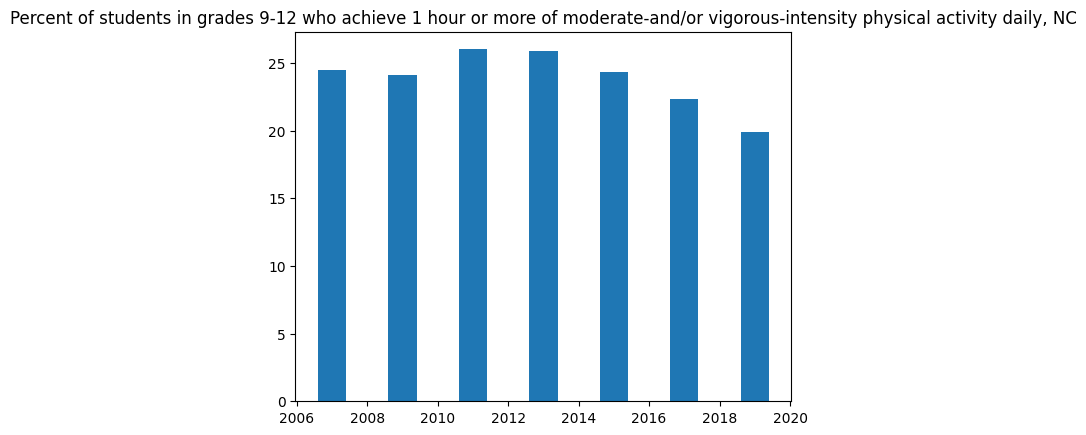

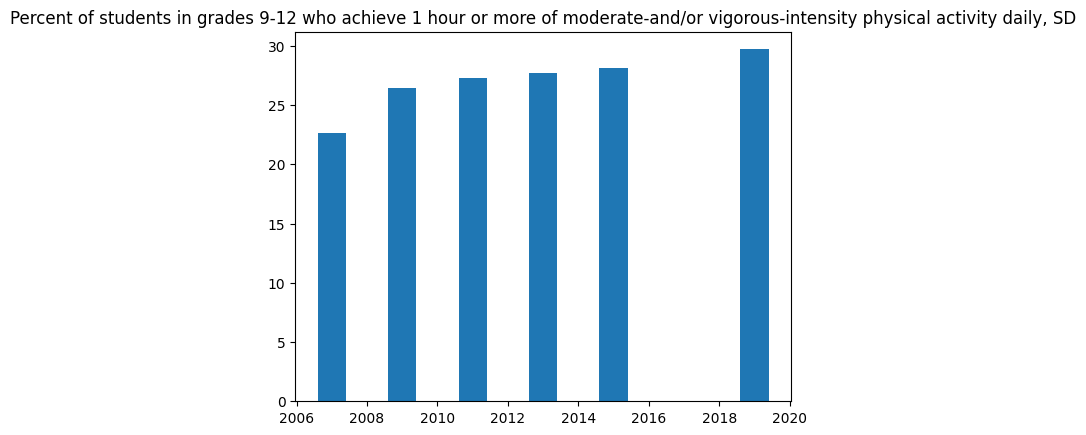

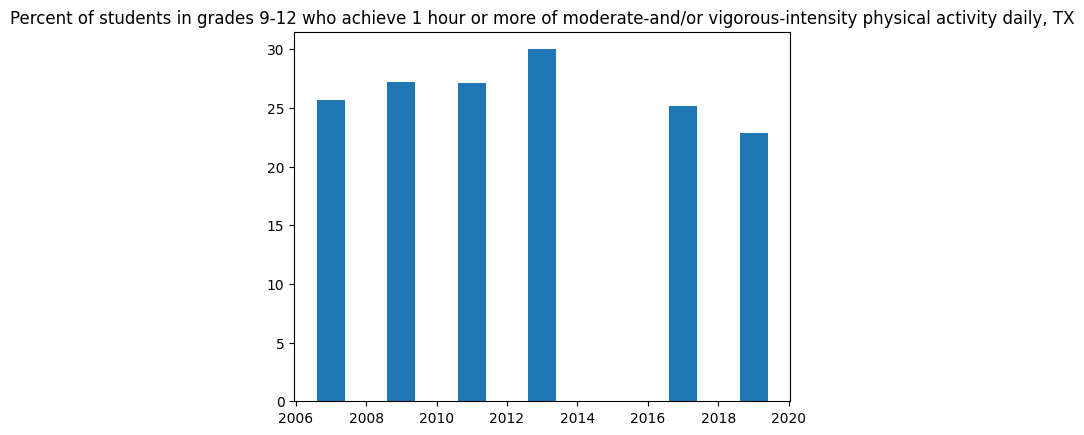

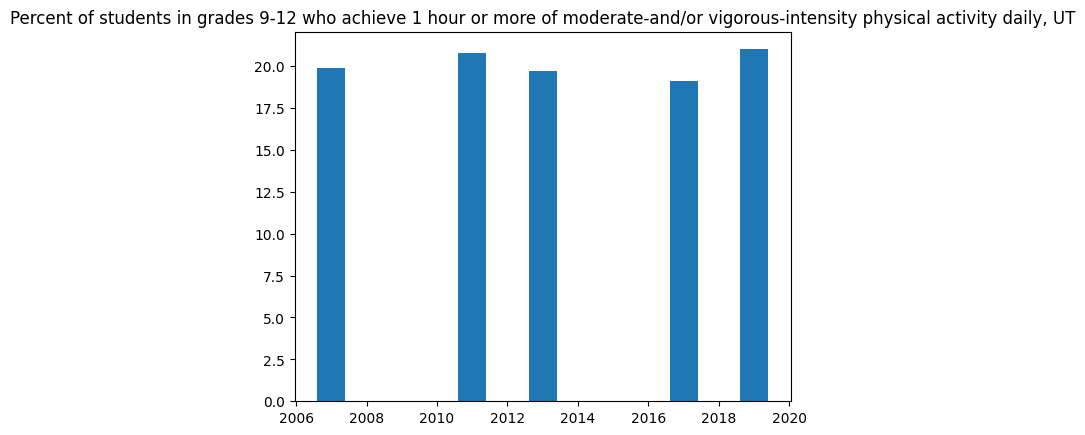

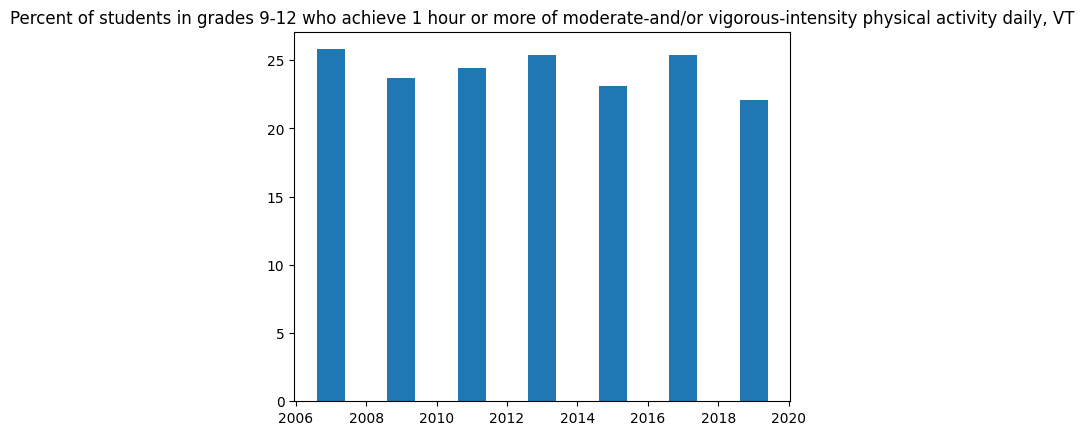

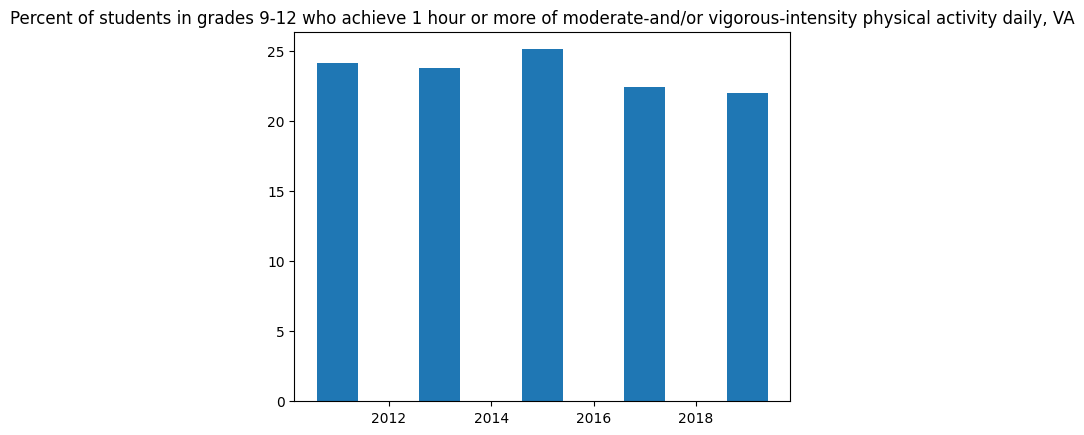

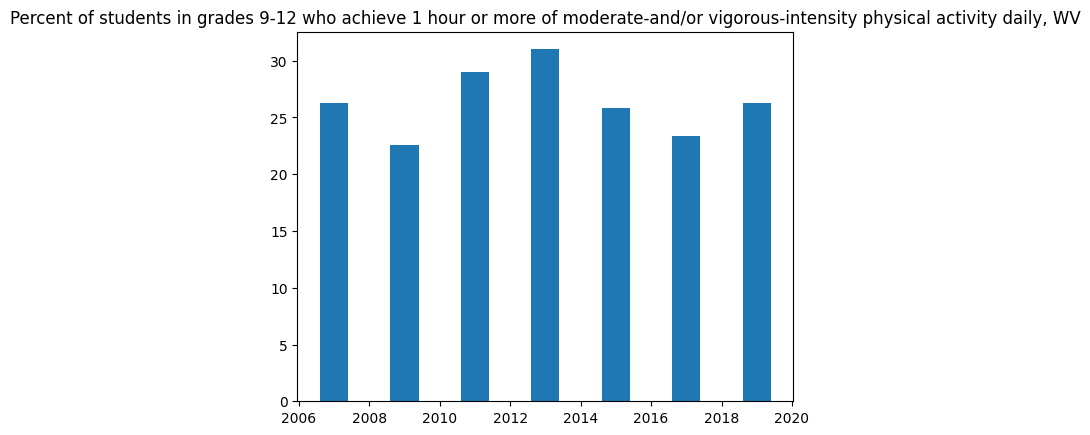

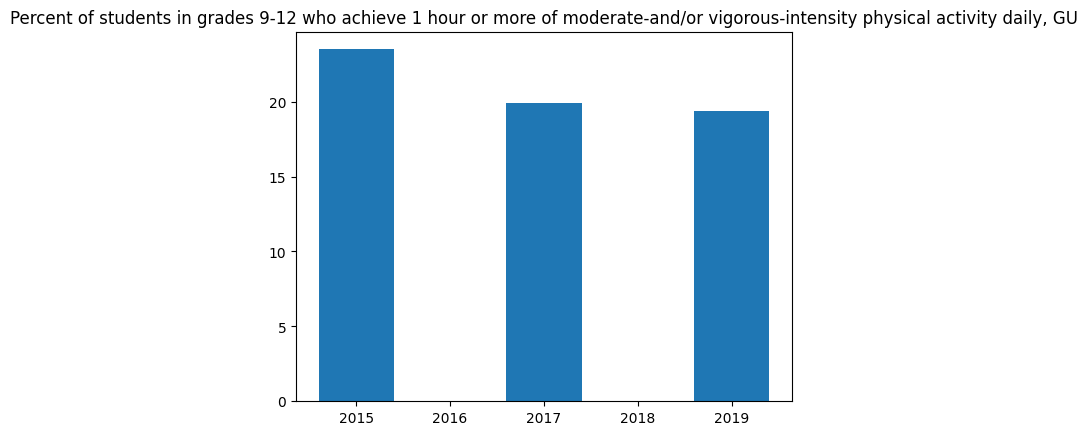

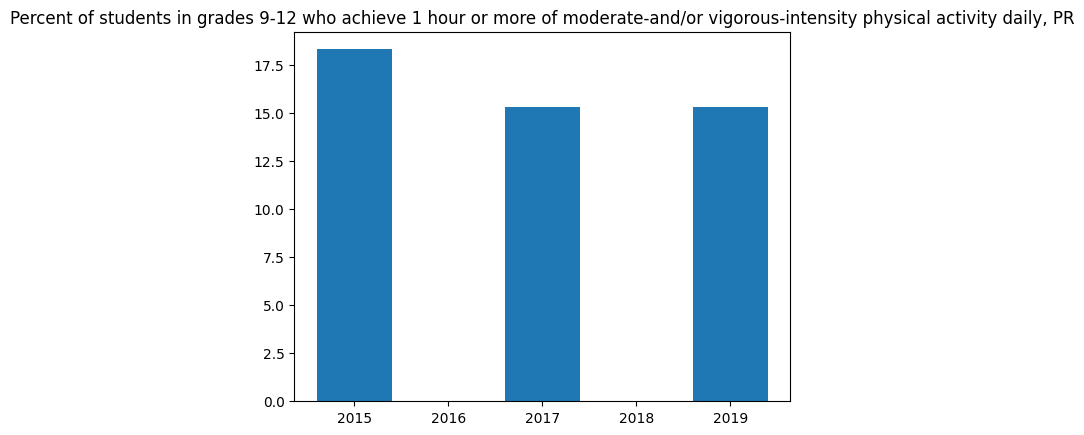

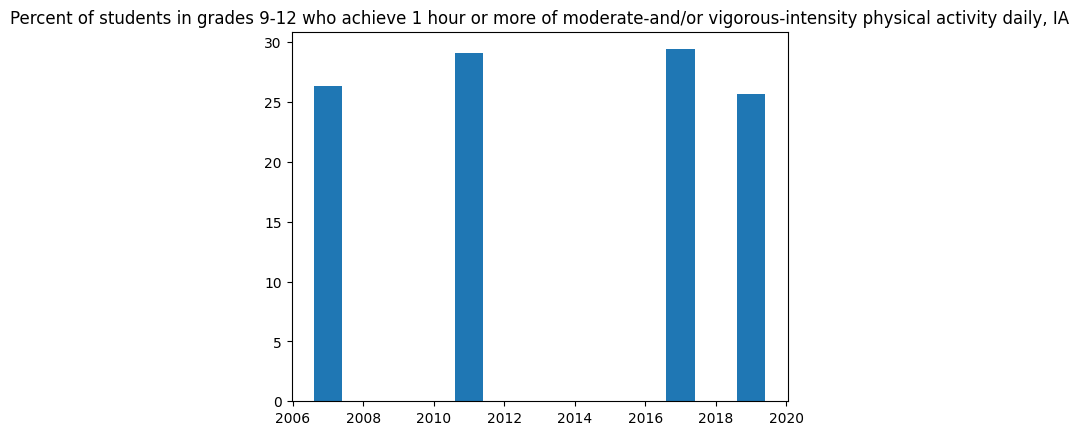

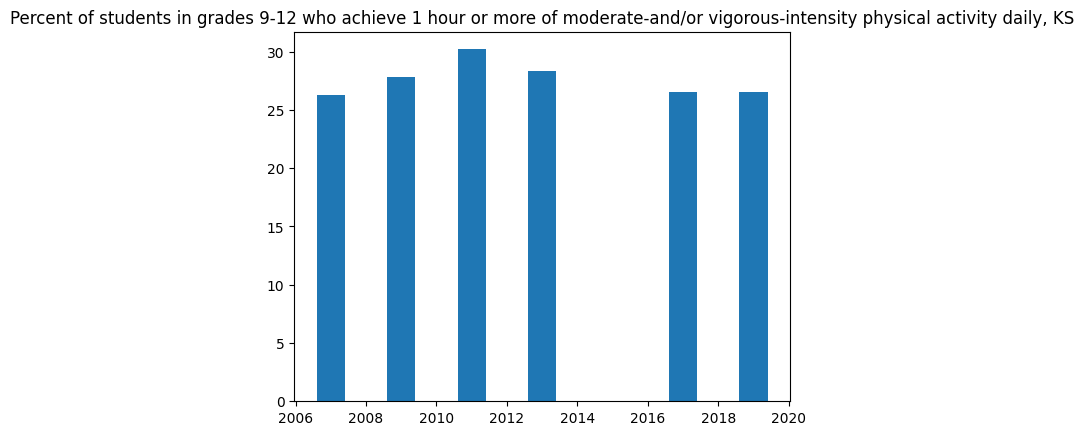

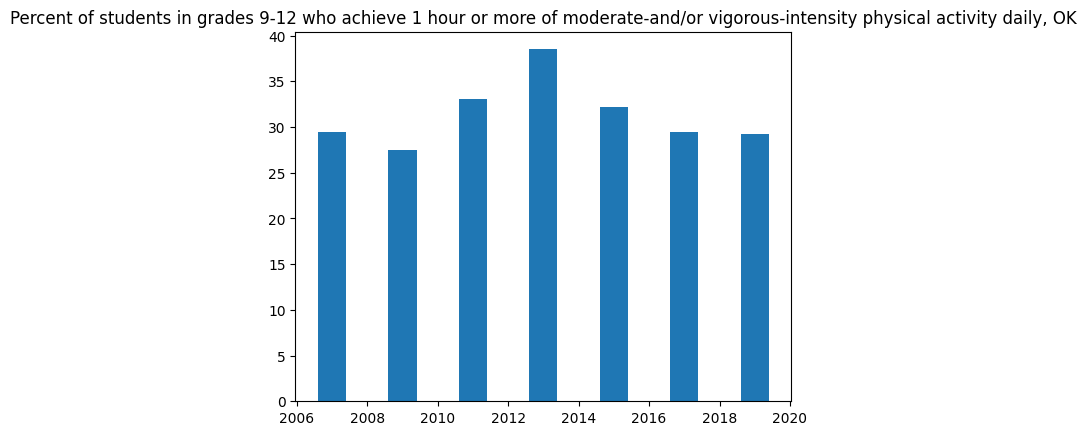

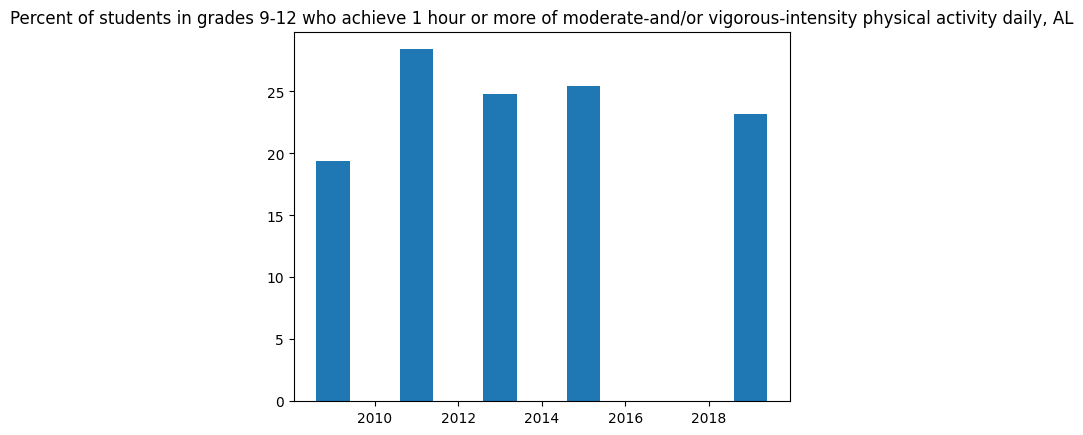

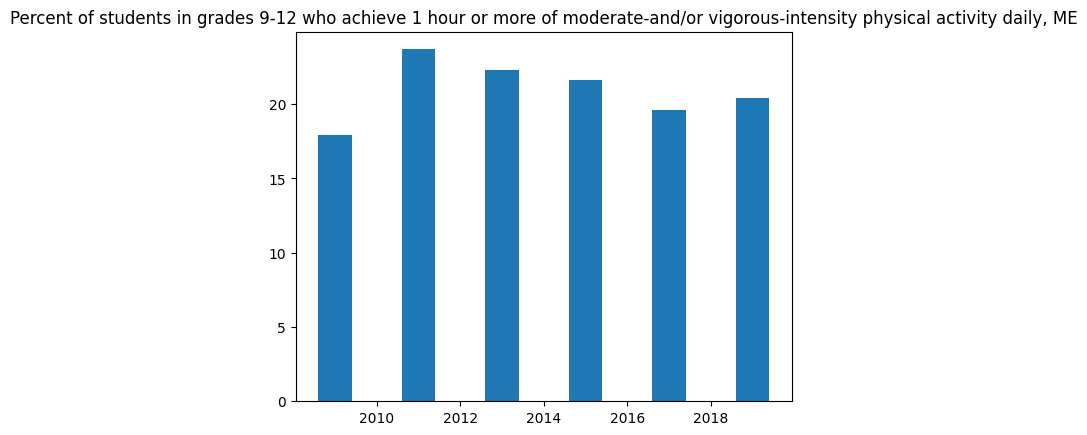

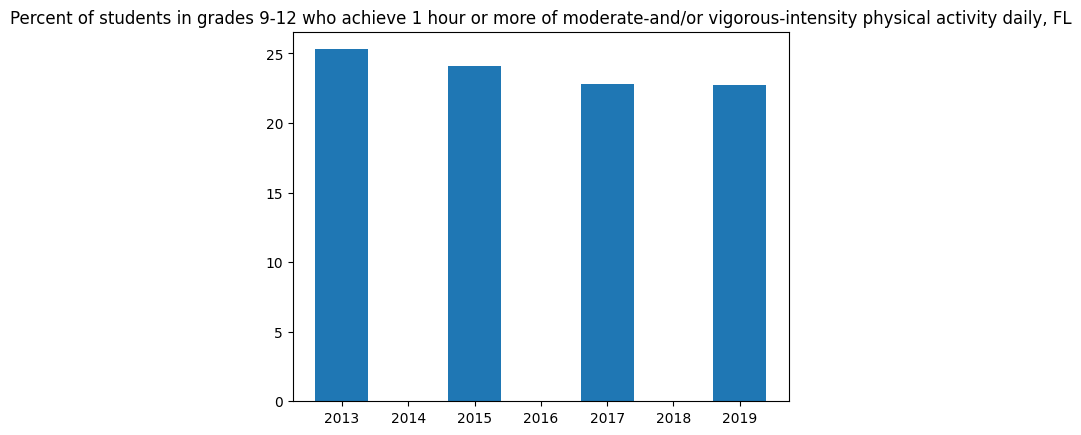

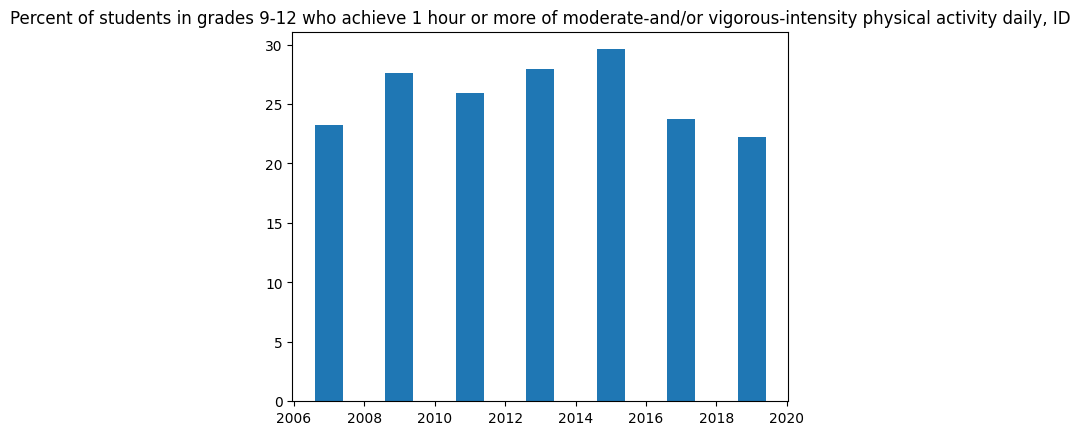

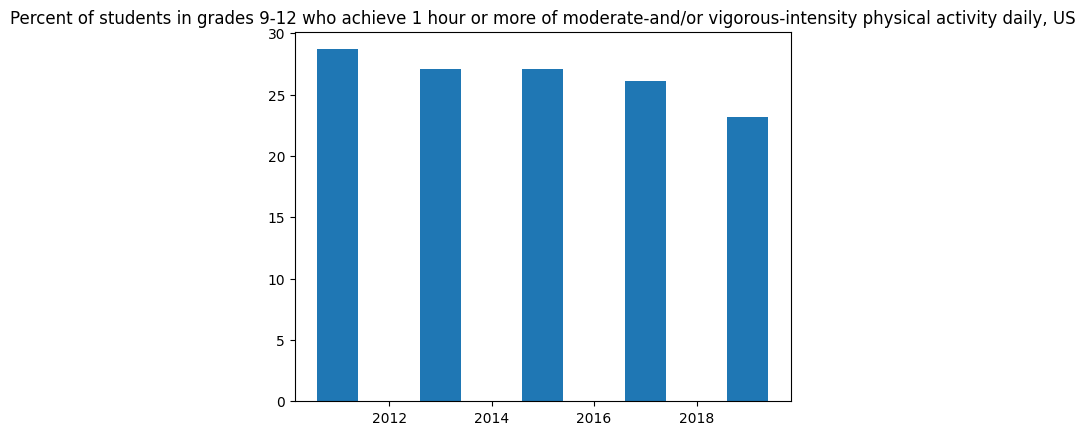

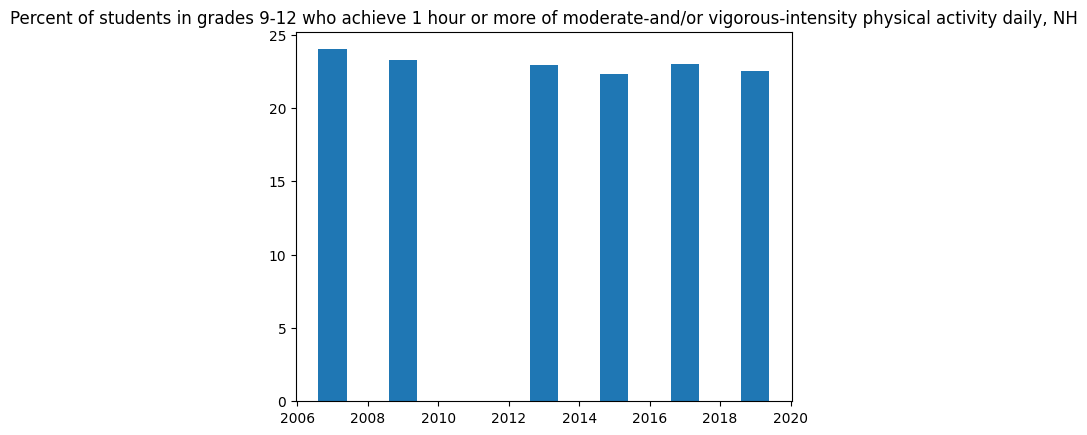

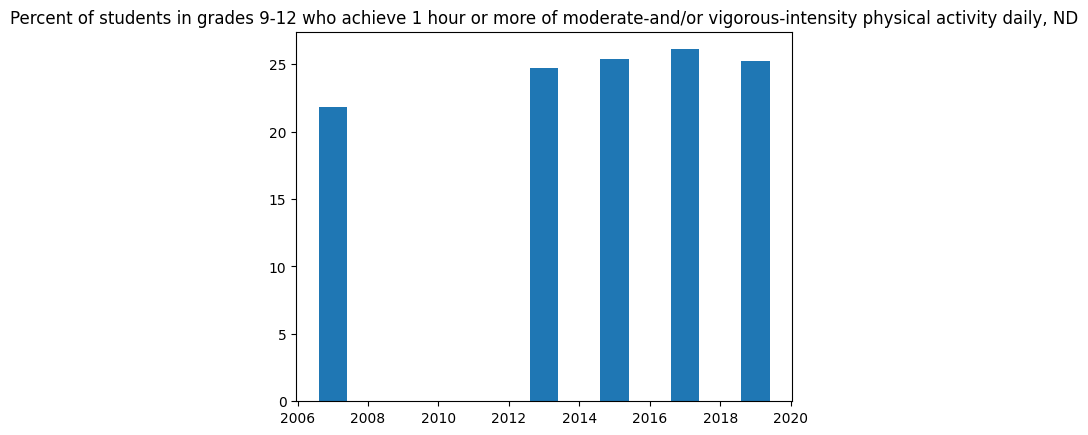

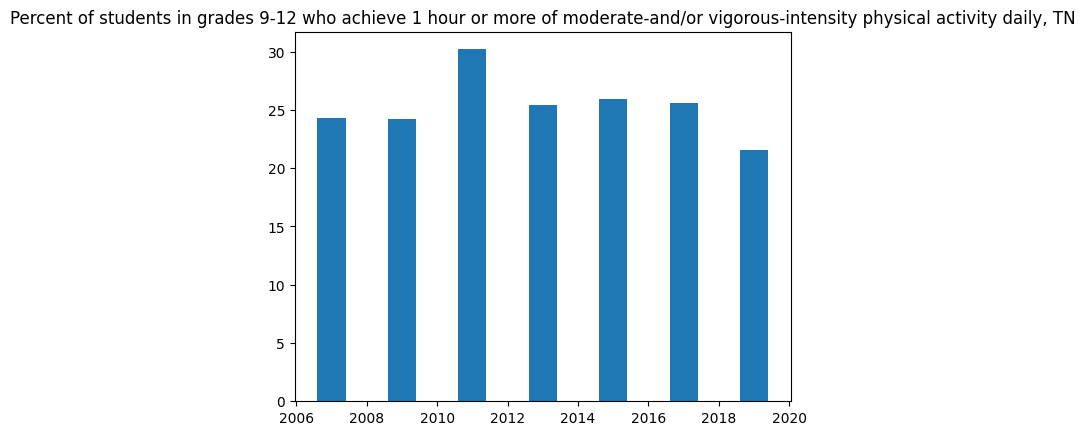

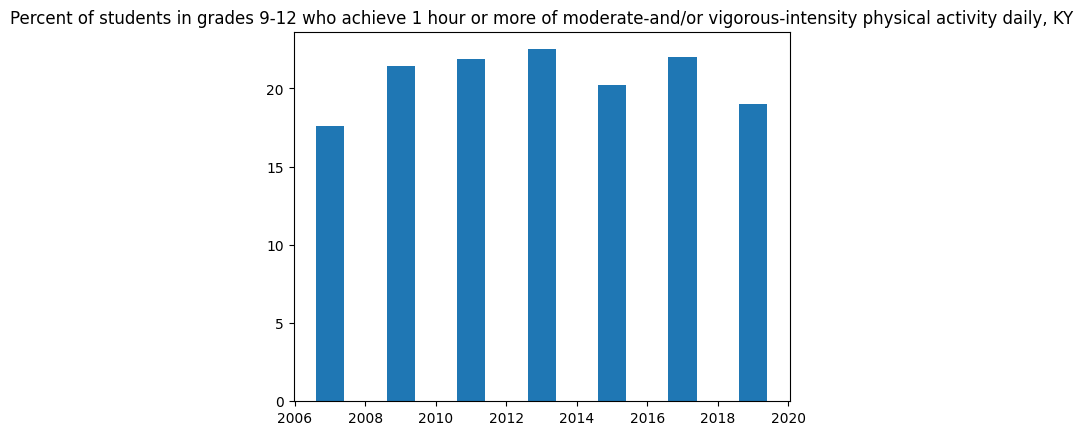

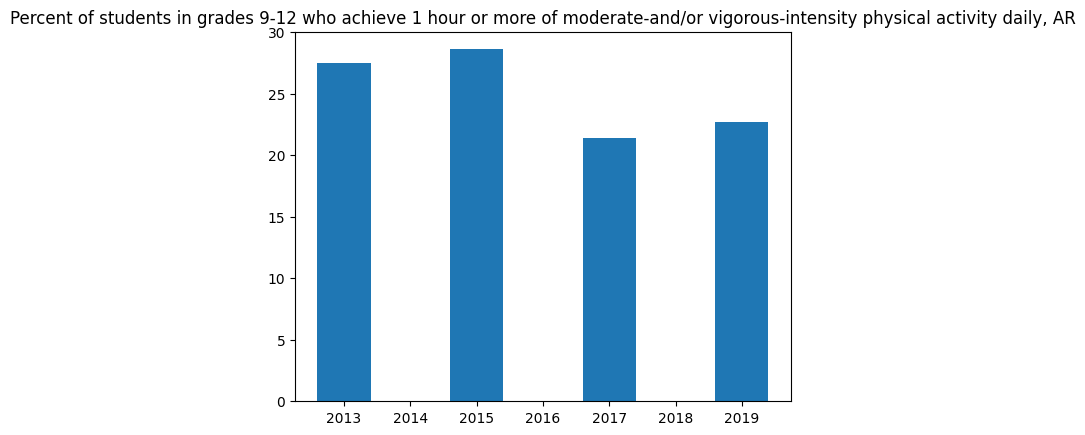

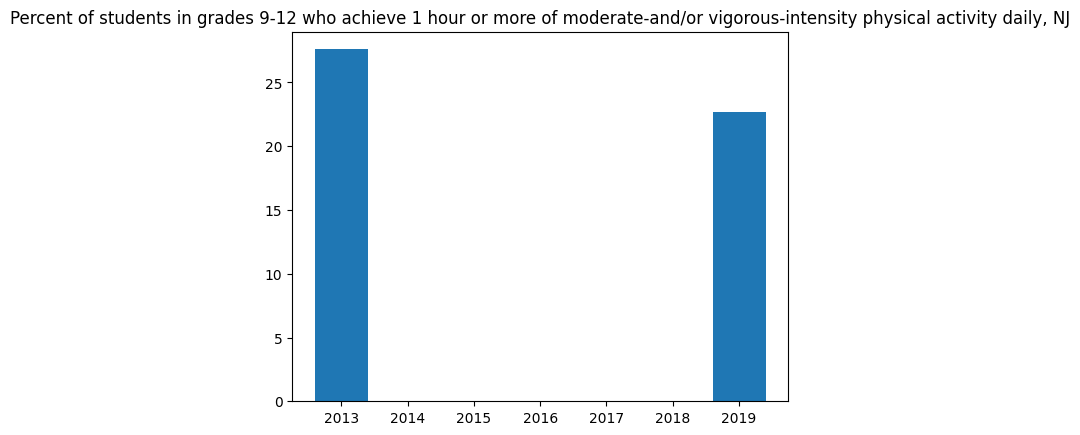

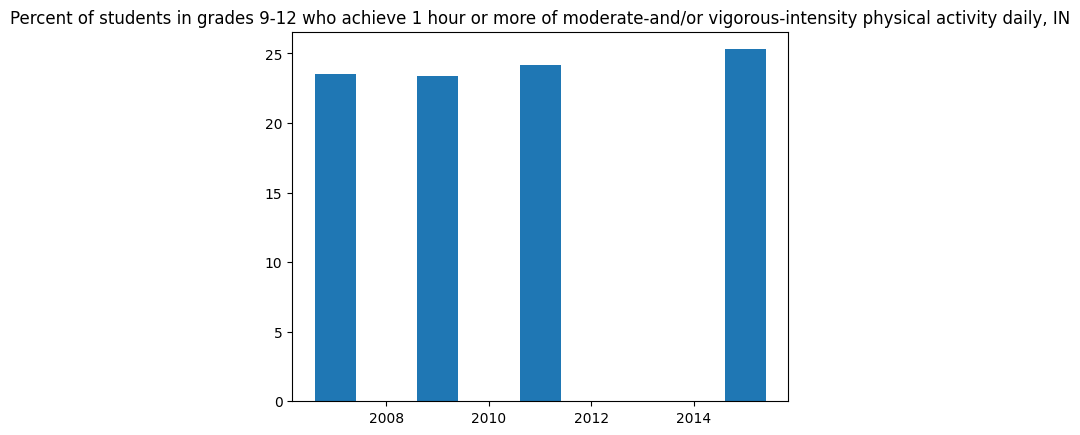

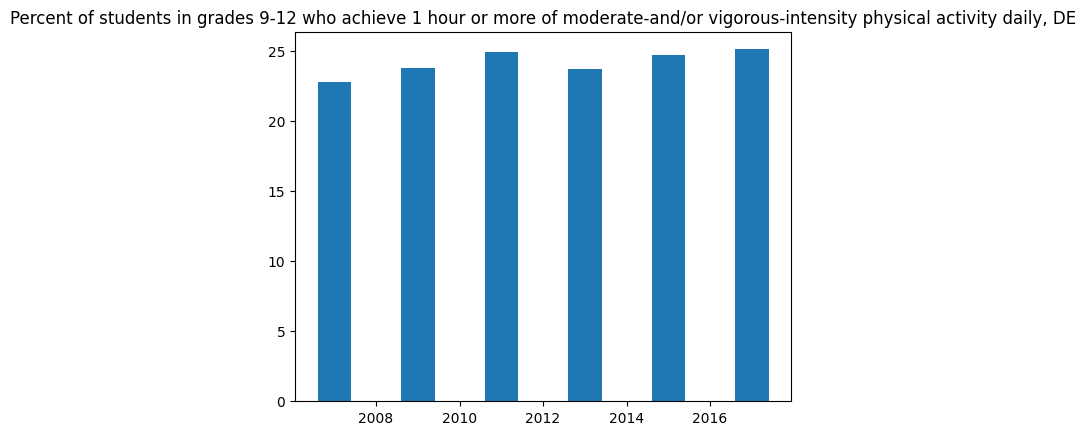

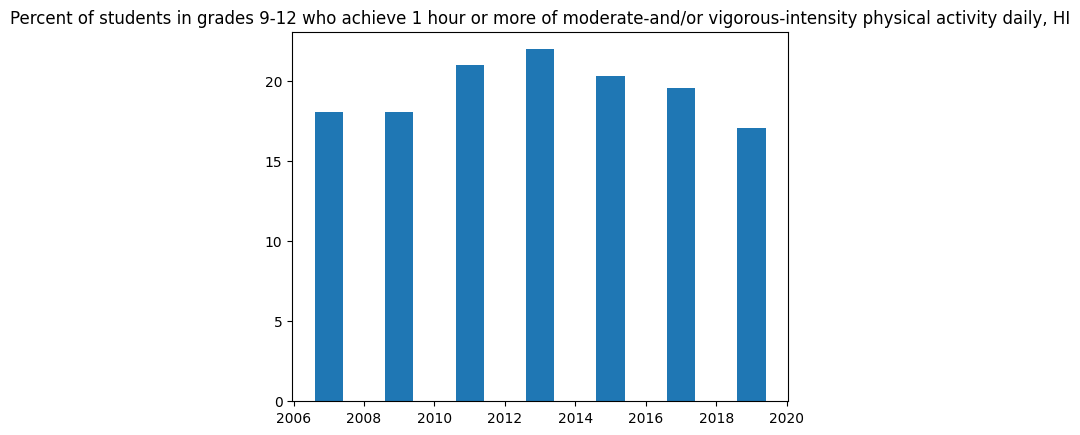

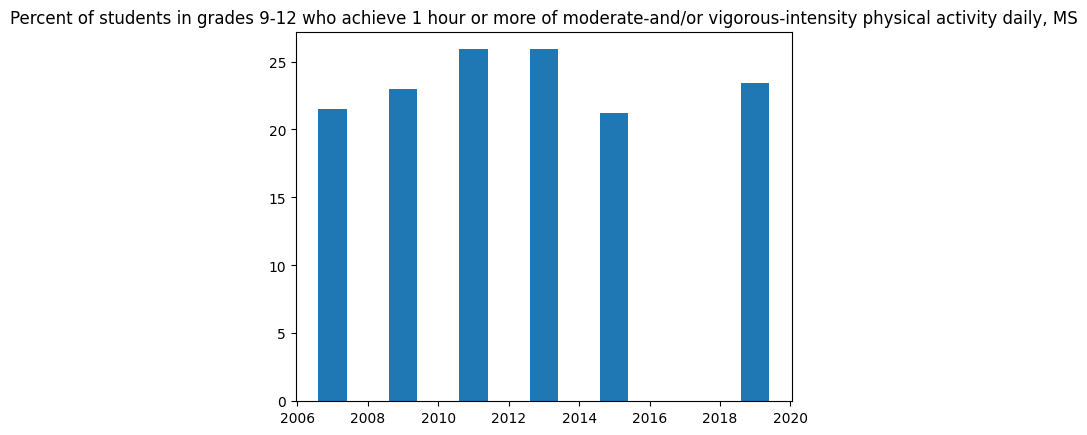

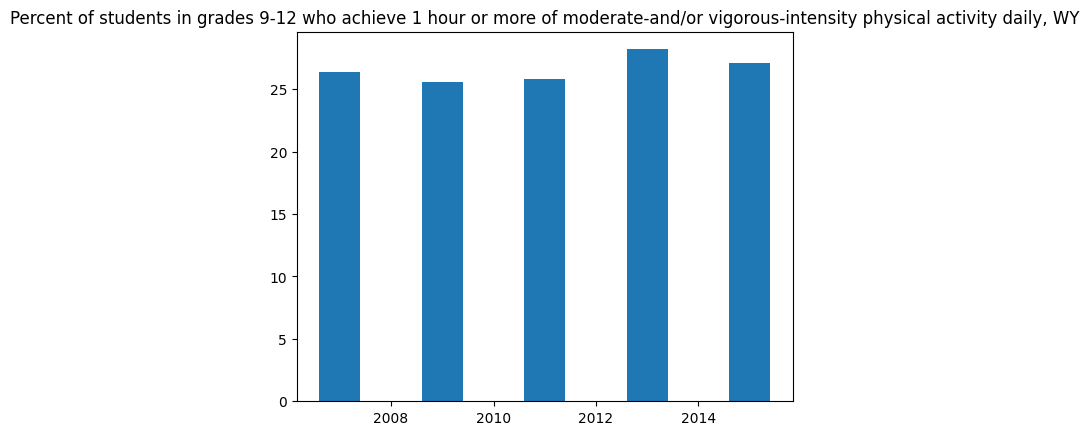

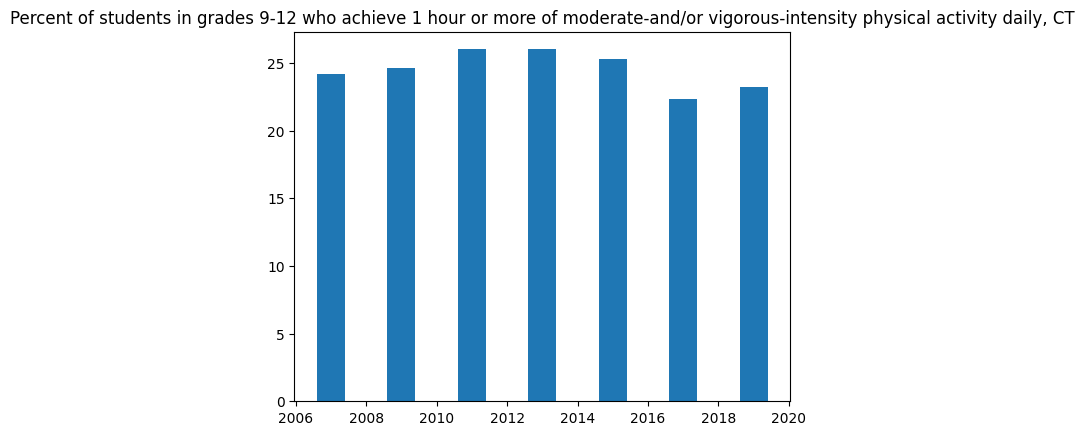

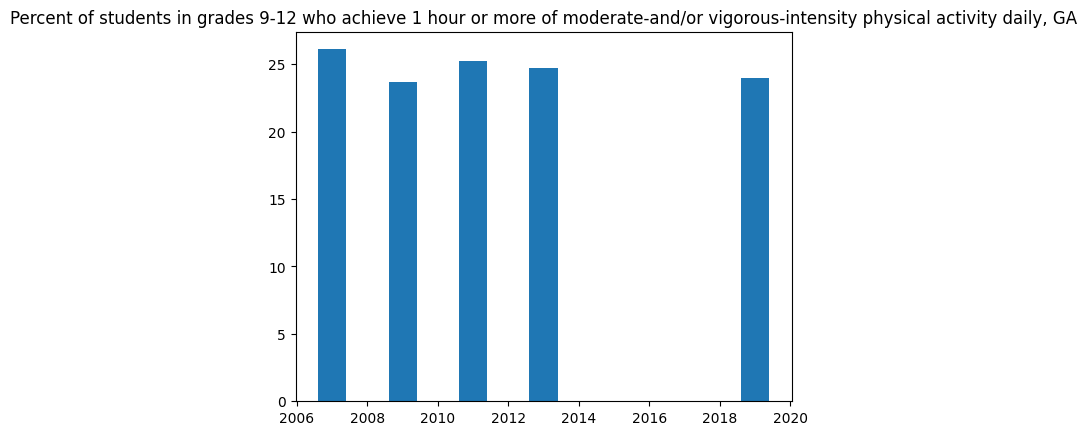

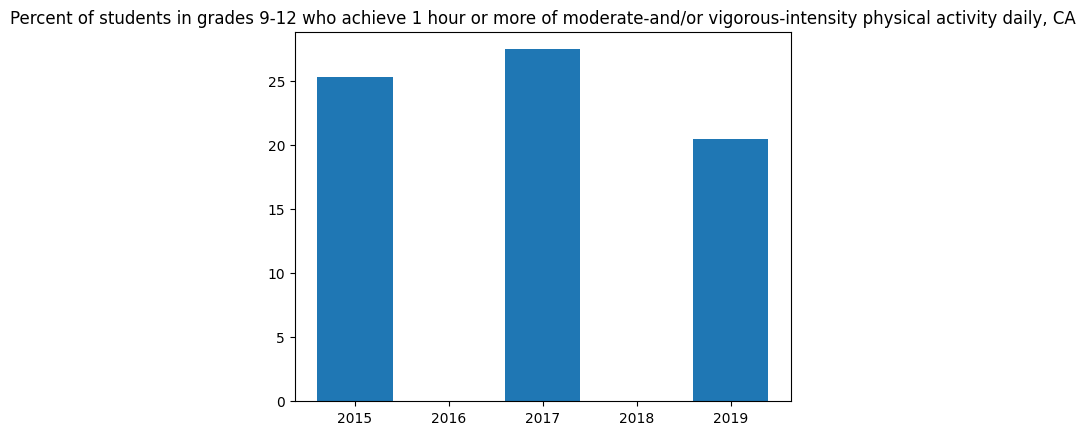

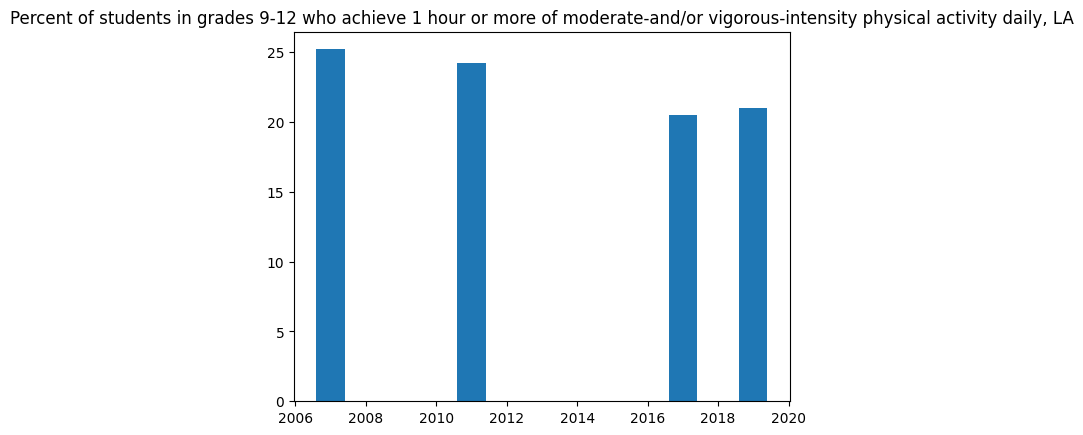

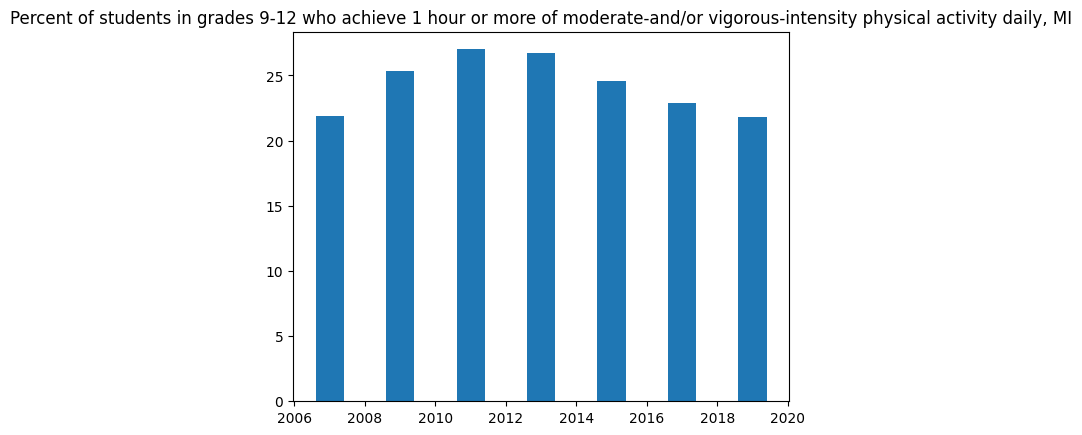

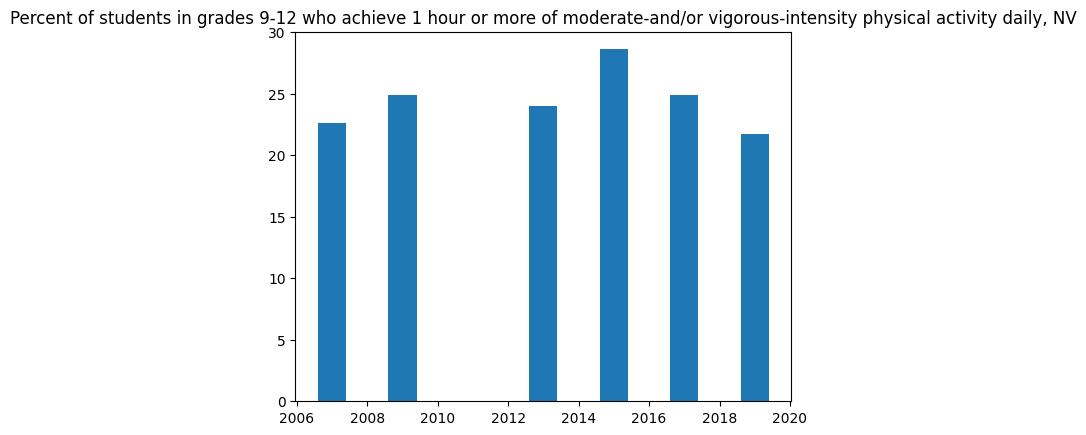

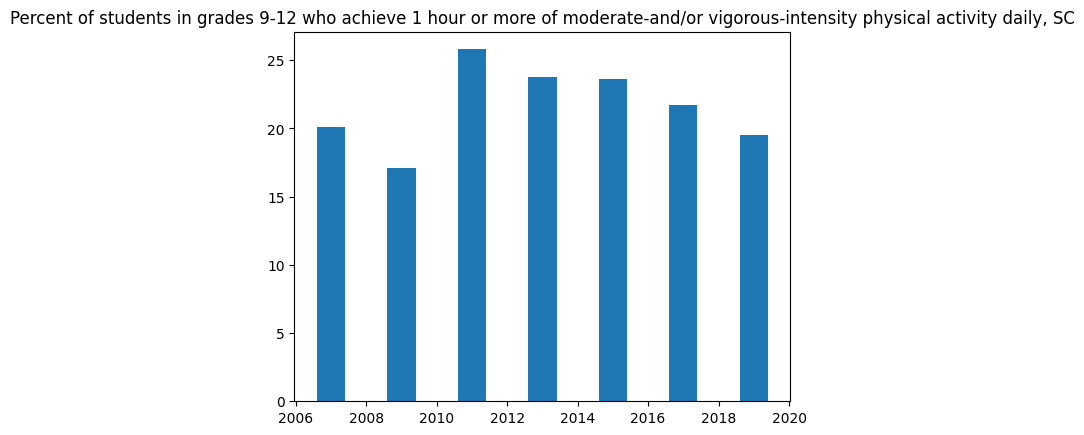

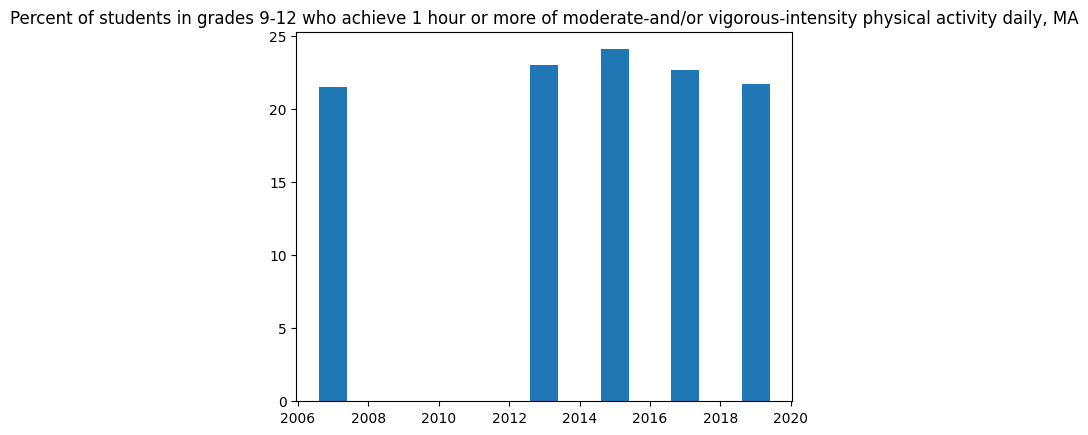

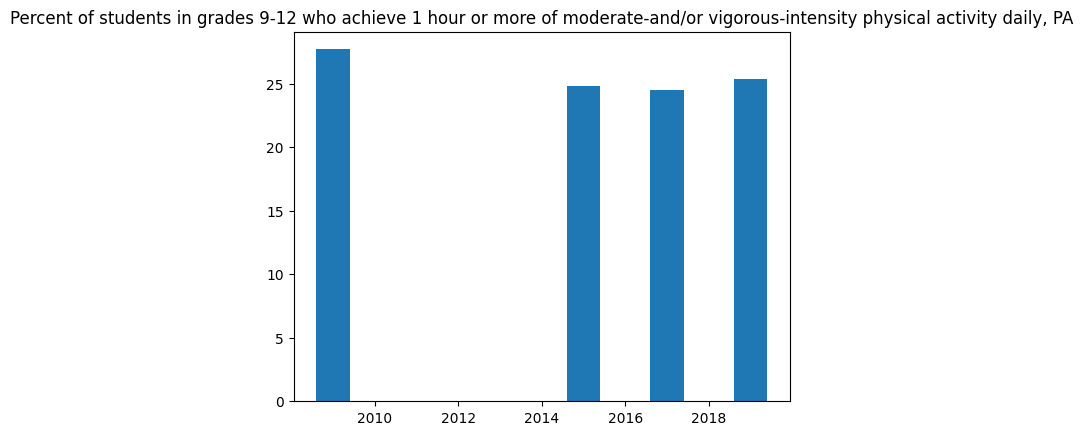

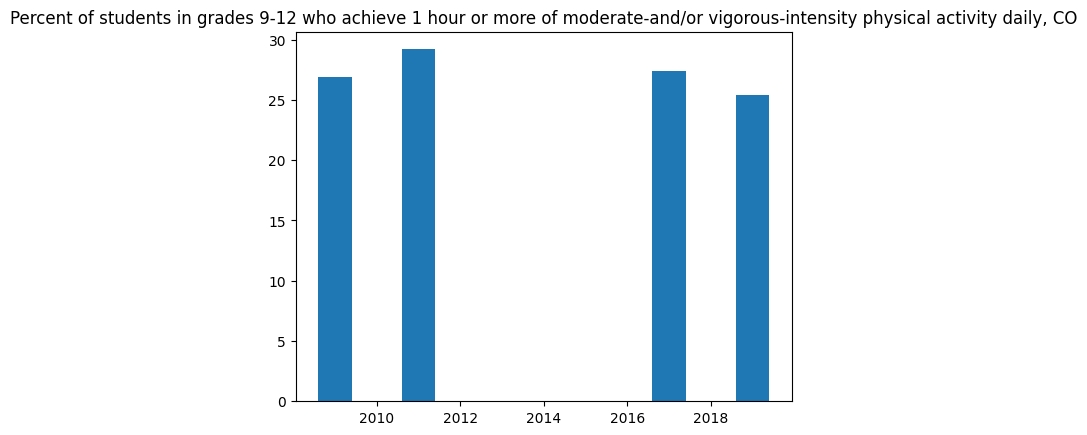

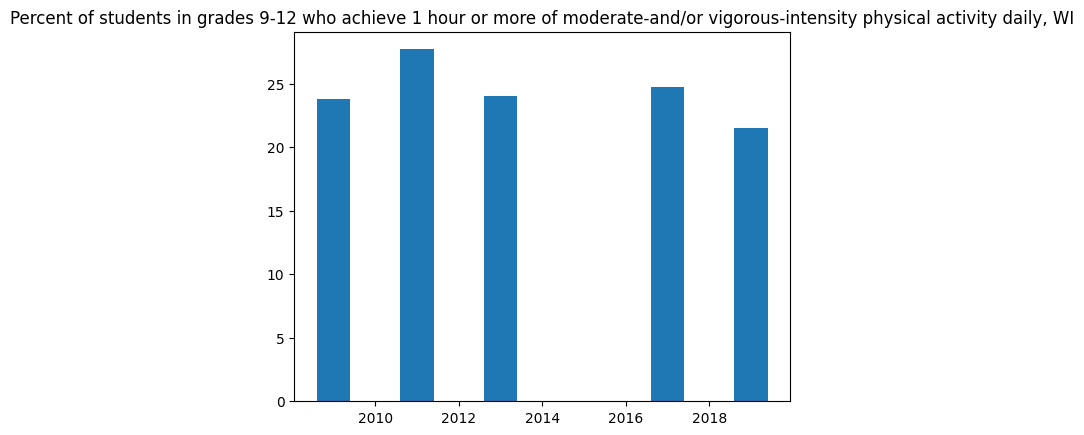

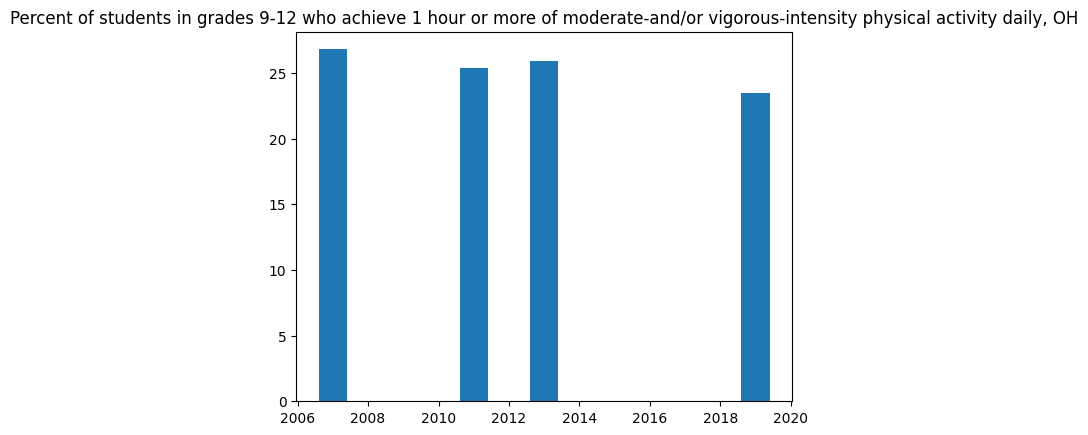

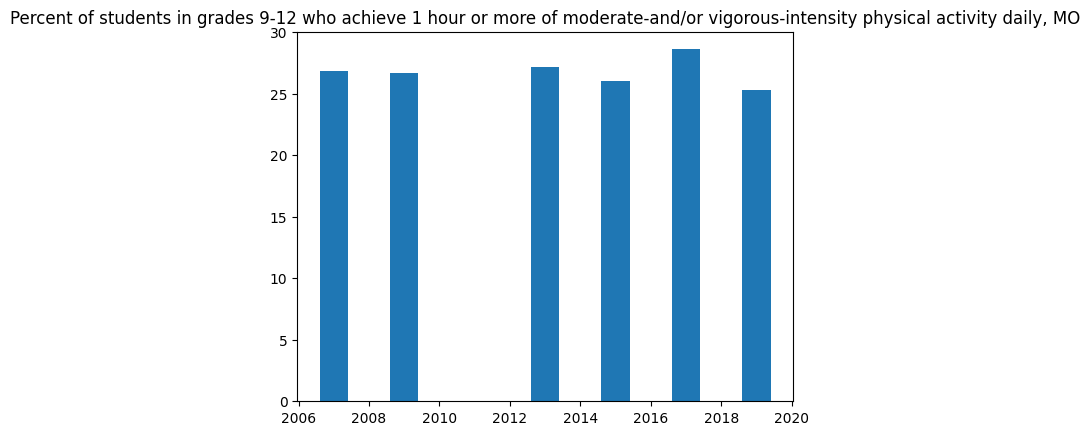

In [14]:
for question in question_and_location_dfs:
    for location in question_and_location_dfs[question]:
        plt.bar(question_and_location_dfs[question][location]["YearStart"].values, question_and_location_dfs[question][location]["Data_Value"].values)
        plt.title(f"{ID_to_question_map[question]}, {location}")
        plt.show()
    break ## REMOVE THIS BREAK STATEMENT FOR ALL GRAPHS